# Swish-based classifier using constant LR with restarts and data fixing
- Swish activation, 4 layers, 100 neurons per layer
- Data is fixed with primary lepton at phi=0 and postive eta and the tau in the positive phi region
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [4]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [6]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 14.886s 


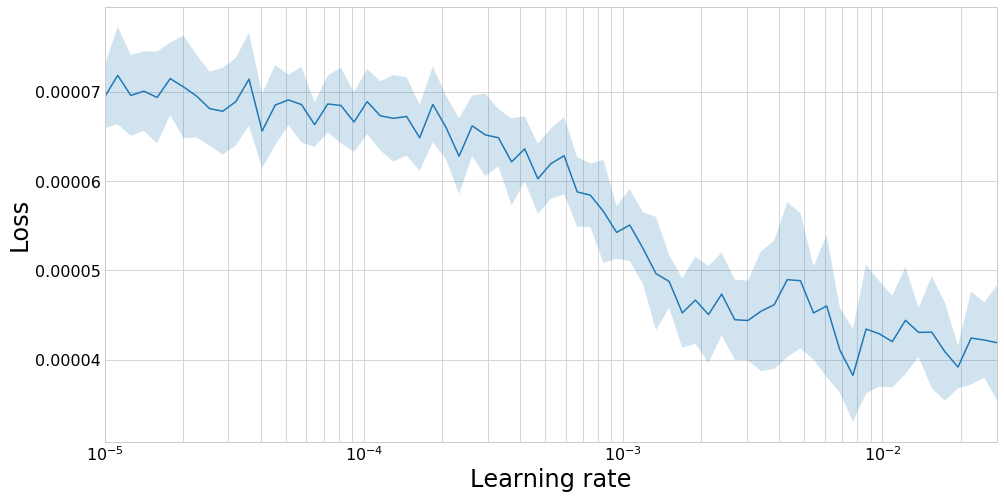

______________________________________



In [7]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 3.7809727692218044e-05
2 New best found: 3.5814957293132825e-05
3 New best found: 3.4933245305482645e-05
5 New best found: 3.4686156852659116e-05
6 New best found: 3.447620023530179e-05
7 New best found: 3.397562779919889e-05
9 New best found: 3.375376062993865e-05
12 New best found: 3.352678068453295e-05
17 New best found: 3.307224608110469e-05
30 New best found: 3.305580818298664e-05
31 New best found: 3.284729822760972e-05
33 New best found: 3.283469775742656e-05
35 New best found: 3.2818581907649125e-05
48 New best found: 3.2695487483912786e-05
60 New best found: 3.262744914992595e-05
Early stopping after 110 epochs
Score is: {'loss': 3.262744914992595e-05, 'wAUC': 0.06650049352315612, 'AUC': 0.10491784423222728, 'AMS': 3.7724086731158635, 'cut': 0.9547224640846252}
Fold took 88.181s

Running fold 2 / 10
1 New best found: 3.6192006328316074e-05
2 New best found: 3.5261796140130865e

Early stopping after 119 epochs
Score is: {'loss': 3.24462599179268e-05, 'wAUC': 0.06583031058487421, 'AUC': 0.10194396854757493, 'AMS': 3.9432268516442917, 'cut': 0.9423264265060425}
Fold took 100.232s

Running fold 10 / 10
1 New best found: 3.7520209417949975e-05
2 New best found: 3.569846689767691e-05
3 New best found: 3.555580175113665e-05
4 New best found: 3.506349187732801e-05
5 New best found: 3.491746554724985e-05
6 New best found: 3.408419324390684e-05
9 New best found: 3.403482333433228e-05
10 New best found: 3.38925400767907e-05
12 New best found: 3.348646965636182e-05
13 New best found: 3.3356262742961235e-05
24 New best found: 3.312681768817308e-05
29 New best found: 3.2886033637822775e-05
38 New best found: 3.282144987314387e-05
58 New best found: 3.265093087002921e-05
Early stopping after 108 epochs
Score is: {'loss': 3.265093087002921e-05, 'wAUC': 0.06690182300231662, 'AUC': 0.10352937381509897, 'AMS': 3.6926751960277246, 'cut': 0.9263733625411987}
Fold took 90.865s


_

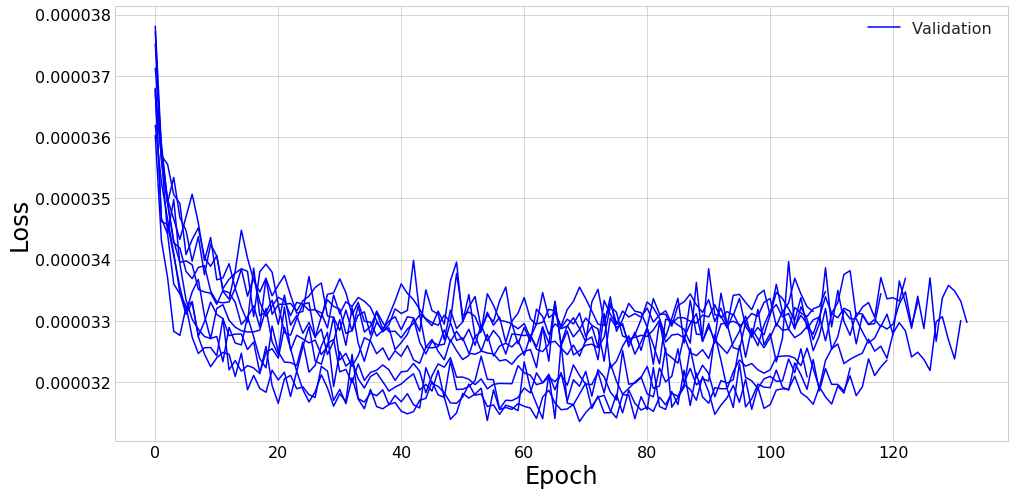

Mean loss = 3.21e-05 +- 2e-07
Mean wAUC = 0.0645 +- 0.0006
Mean AUC = 0.1021 +- 0.0007
Mean AMS = 3.81 +- 0.07
Mean cut = 0.947 +- 0.01
______________________________________



In [8]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [9]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [10]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 3.135926243267022e-05
Model 1 is 7 with loss = 3.140573928547034e-05
Model 2 is 3 with loss = 3.1565461664285976e-05
Model 3 is 1 with loss = 3.176257976357647e-05
Model 4 is 4 with loss = 3.223425643373048e-05
Model 5 is 2 with loss = 3.23002343460192e-05
Model 6 is 8 with loss = 3.24462599179268e-05
Model 7 is 6 with loss = 3.258105670101941e-05
Model 8 is 0 with loss = 3.262744914992595e-05
Model 9 is 9 with loss = 3.265093087002921e-05


## Response on validation data

In [11]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.0014506644566019532s per sample

Predicting batch 2 out of 10
Prediction took 0.00028279720100108535s per sample

Predicting batch 3 out of 10
Prediction took 0.0002773899111984065s per sample

Predicting batch 4 out of 10
Prediction took 0.0002753490604023682s per sample

Predicting batch 5 out of 10
Prediction took 0.0002841216659988277s per sample

Predicting batch 6 out of 10
Prediction took 0.00028910819080192596s per sample

Predicting batch 7 out of 10
Prediction took 0.00027431804700172506s per sample

Predicting batch 8 out of 10
Prediction took 0.0002719802031992003s per sample

Predicting batch 9 out of 10
Prediction took 0.00027302809639950283s per sample

Predicting batch 10 out of 10
Prediction took 0.0003075765672023408s per sample



In [13]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9019998650436721, weighted 0.9355170539133439


In [14]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.9092599255870795, 0.95528466)

In [15]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.02
Exact mean cut 0.95935044484213, corresponds to AMS of 3.807956773209947
CPU times: user 1.94 s, sys: 11.1 s, total: 13 s
Wall time: 2min 58s


(4.0, 0.96)

# Test scoring

In [16]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [17]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.0002888643304544861s per sample

Predicting batch 2 out of 10
Prediction took 0.0002950740005455869s per sample

Predicting batch 3 out of 10
Prediction took 0.0002898080628545193s per sample

Predicting batch 4 out of 10
Prediction took 0.000289151482145429s per sample

Predicting batch 5 out of 10
Prediction took 0.00029835675685449547s per sample

Predicting batch 6 out of 10
Prediction took 0.00030543712892712476s per sample

Predicting batch 7 out of 10
Prediction took 0.0002955771620181622s per sample

Predicting batch 8 out of 10
Prediction took 0.00036011264250899495s per sample

Predicting batch 9 out of 10
Prediction took 0.0003381946362181969s per sample

Predicting batch 10 out of 10
Prediction took 0.0002897253144363111s per sample

CPU times: user 3min 12s, sys: 7.76 s, total: 3min 20s
Wall time: 2min 47s


In [18]:
scoreTestOD(testData.source, 0.95935044484213)

Public:Private AMS: 3.5341954453978057 : 3.6551785049001895


(3.5341954453978057, 3.6551785049001895)

# Save/Load

In [19]:
name = "weights/Swish_Fixed"

In [20]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)